In [20]:
import pandas as pd
import os

# input rawdata

In [21]:
path=os.path.join('~','station2grid','datasets','rawdata','air','airbox-2018.csv')
df_=pd.read_csv(path)
df_.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2018-01-01,00:00:03,74DA38C7CF9E,39,47,29,21.00,72,23.897,120.938
1,2018-01-01,00:00:01,74DA38C7D156,29,36,19,16.75,90,24.923,121.250
2,2018-01-01,00:00:05,74DA38B050B6,56,76,36,18.25,92,22.995,120.163
3,2018-01-01,00:00:15,74DA38E2B5A6,26,30,17,21.75,53,24.160,120.652
4,2018-01-01,00:00:09,74DA38B050E2,68,90,48,19.50,95,23.757,120.681


In [22]:
df=df_[-5000000:].copy()
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
30475777,2018-11-02,21:58:52,74DA38C7CF02,3,4,2,24.25,100,24.912,121.184
30475778,2018-11-02,21:58:55,74DA38E2B4AA,1,1,0,24.87,61,24.931,121.511
30475779,2018-11-02,21:58:56,74DA38F20E62,20,23,11,24.25,92,24.645,120.809
30475780,2018-11-02,21:58:55,74DA38E2B75A,42,52,25,25.62,100,23.589,120.357
30475781,2018-11-02,21:58:59,74DA38F20946,8,8,5,25.75,83,24.764,120.992


# check device same lat,lon

In [23]:
dummy=df[['lat','lon','device_id']].drop_duplicates(subset=['device_id'])
c=dummy.duplicated(subset=['lat','lon'],keep=False)
dummy[c].sort_values(by=['lat','lon']).head(4)

,lat,lon,device_id
30476066,-6.168,106.789,74DA38F2126E
32680909,-6.168,106.789,74DA38F21274
32681028,-6.168,106.789,74DA38F21270
30475906,0.000,0.000,74DA38F2099A


# add new time label

In [24]:
def change_time_interval(dt,time_interval):
    dt=pd.to_datetime(dt)
    minute = dt.minute
    second = dt.second
    minute = minute+(second/60)
    minute = round(minute/time_interval) * time_interval
    dt = dt.replace(minute=0,second=0)
    dt = dt+pd.Timedelta(minutes=minute)
    return dt
    
0
15
30
45
60

time_interval=30
print(change_time_interval('2018-11-28 22:14:31',time_interval))
print(change_time_interval('2018-11-28 22:16:31',time_interval))
print(change_time_interval('2018-11-28 22:44:31',time_interval))


2018-11-28 22:00:00
2018-11-28 22:30:00
2018-11-28 22:30:00


In [25]:
df['dt']=df.apply(lambda row: row['Date']+' '+row['Time'],axis=1)
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,dt
30475777,2018-11-02,21:58:52,74DA38C7CF02,3,4,2,24.25,100,24.912,121.184,2018-11-02 21:58:52
30475778,2018-11-02,21:58:55,74DA38E2B4AA,1,1,0,24.87,61,24.931,121.511,2018-11-02 21:58:55
30475779,2018-11-02,21:58:56,74DA38F20E62,20,23,11,24.25,92,24.645,120.809,2018-11-02 21:58:56
30475780,2018-11-02,21:58:55,74DA38E2B75A,42,52,25,25.62,100,23.589,120.357,2018-11-02 21:58:55
30475781,2018-11-02,21:58:59,74DA38F20946,8,8,5,25.75,83,24.764,120.992,2018-11-02 21:58:59


In [26]:
df['dt2']=df['dt'].apply(lambda x: change_time_interval(x,30))
df.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,dt,dt2
30475777,2018-11-02,21:58:52,74DA38C7CF02,3,4,2,24.25,100,24.912,121.184,2018-11-02 21:58:52,2018-11-02 22:00:00
30475778,2018-11-02,21:58:55,74DA38E2B4AA,1,1,0,24.87,61,24.931,121.511,2018-11-02 21:58:55,2018-11-02 22:00:00
30475779,2018-11-02,21:58:56,74DA38F20E62,20,23,11,24.25,92,24.645,120.809,2018-11-02 21:58:56,2018-11-02 22:00:00
30475780,2018-11-02,21:58:55,74DA38E2B75A,42,52,25,25.62,100,23.589,120.357,2018-11-02 21:58:55,2018-11-02 22:00:00
30475781,2018-11-02,21:58:59,74DA38F20946,8,8,5,25.75,83,24.764,120.992,2018-11-02 21:58:59,2018-11-02 22:00:00


# group position (lat,lon) by time

## visualize

In [27]:
df.groupby(by=['dt2','lat','lon']).count().tail(10)

Date  Time  device_id  PM2.5  PM10  PM1  \
dt2                 lat    lon                                                 
2019-01-01 08:00:00 35.220  128.559     1     1          1      1     1    1   
                    35.703  51.349      1     1          1      1     1    1   
                    37.484  127.116     7     7          7      7     7    7   
                    37.513  127.099     1     1          1      1     1    1   
                    38.475  27.072      1     1          1      1     1    1   
                    38.564 -121.716     1     1          1      1     1    1   
                    41.788 -87.604      1     1          1      1     1    1   
                    41.799 -87.691      1     1          1      1     1    1   
                    51.150  6.453       2     2          2      2     2    2   
                    52.196  20.987      1     1          1      1     1    1   

                                     Temperature  Humidity  dt  
dt2                 lat    lon                                  
2019-01-01 08:00:00 35.220  128.559            1         1   1  
                    35.703  51.349             1         1   1  
                    37.484  127.116            7         7   7  
                    37.513  127.099            1         1   1  
                    38.475  27.072             1         1   1  
                    38.564 -121.716            1         1   1  
                    41.788 -87.604             1         1   1  
                    41.799 -87.691             1         1   1  
                    51.150  6.453              2         2   2  
                    52.196  20.987             1         1   1

In [28]:
df.groupby(by=['dt2','lat','lon','device_id']).count().tail(10)

Date  Time  PM2.5  PM10  \
dt2                 lat    lon      device_id                               
2019-01-01 08:00:00 37.484  127.116 74DA38CD6810     1     1      1     1   
                                    74DA38CD6866     2     2      2     2   
                                    74DA38CD6894     1     1      1     1   
                    37.513  127.099 74DA38CD680A     1     1      1     1   
                    38.475  27.072  74DA38EBF68C     1     1      1     1   
                    38.564 -121.716 74DA388FF418     1     1      1     1   
                    41.788 -87.604  74DA38C7D204     1     1      1     1   
                    41.799 -87.691  74DA38C7D20A     1     1      1     1   
                    51.150  6.453   74DA388FF6D0     2     2      2     2   
                    52.196  20.987  74DA38C7D4F6     1     1      1     1   

                                                  PM1  Temperature  Humidity  \
dt2                 lat    lon      device_id                                  
2019-01-01 08:00:00 37.484  127.116 74DA38CD6810    1            1         1   
                                    74DA38CD6866    2            2         2   
                                    74DA38CD6894    1            1         1   
                    37.513  127.099 74DA38CD680A    1            1         1   
                    38.475  27.072  74DA38EBF68C    1            1         1   
                    38.564 -121.716 74DA388FF418    1            1         1   
                    41.788 -87.604  74DA38C7D204    1            1         1   
                    41.799 -87.691  74DA38C7D20A    1            1         1   
                    51.150  6.453   74DA388FF6D0    2            2         2   
                    52.196  20.987  74DA38C7D4F6    1            1         1   

                                                  dt  
dt2                 lat    lon      device_id         
2019-01-01 08:00:00 37.484  127.116 74DA38CD6810   1  
                                    74DA38CD6866   2  
                                    74DA38CD6894   1  
                    37.513  127.099 74DA38CD680A   1  
                    38.475  27.072  74DA38EBF68C   1  
                    38.564 -121.716 74DA388FF418   1  
                    41.788 -87.604  74DA38C7D204   1  
                    41.799 -87.691  74DA38C7D20A   1  
                    51.150  6.453   74DA388FF6D0   2  
                    52.196  20.987  74DA38C7D4F6   1

## one position(lat,lon) output one value(median) in a specific periord(0.5hr)

In [29]:
df_median=df.groupby(by=['dt2','lat','lon']).median().reset_index(drop=False)
df_median.head()

,dt2,lat,lon,PM2.5,PM10,PM1,Temperature,Humidity
0,2018-11-02 22:00:00,-6.168,106.789,51.0,63.0,33.0,31.12,66.0
1,2018-11-02 22:00:00,-6.128,106.788,11.0,12.0,8.0,32.75,49.0
2,2018-11-02 22:00:00,0.000,0.000,25.0,26.0,17.0,31.56,63.0
3,2018-11-02 22:00:00,1.322,103.869,12.0,13.0,10.0,32.25,77.0
4,2018-11-02 22:00:00,2.876,101.498,26.5,30.0,19.0,30.37,82.0


# drop 'PM1' column

In [30]:
df_median=df_median.drop(columns=['PM1'])
df_median.head()

,dt2,lat,lon,PM2.5,PM10,Temperature,Humidity
0,2018-11-02 22:00:00,-6.168,106.789,51.0,63.0,31.12,66.0
1,2018-11-02 22:00:00,-6.128,106.788,11.0,12.0,32.75,49.0
2,2018-11-02 22:00:00,0.000,0.000,25.0,26.0,31.56,63.0
3,2018-11-02 22:00:00,1.322,103.869,12.0,13.0,32.25,77.0
4,2018-11-02 22:00:00,2.876,101.498,26.5,30.0,30.37,82.0


# rename columns

In [31]:
columns={
    'dt2':'dt',
    'PM2.5':'pm25',
    'PM10':'pm10',
    'Temperature':'temperature',
    'Humidity':'humidity',
}
df_median=df_median.rename(columns=columns)
df_median.head()

,dt,lat,lon,pm25,pm10,temperature,humidity
0,2018-11-02 22:00:00,-6.168,106.789,51.0,63.0,31.12,66.0
1,2018-11-02 22:00:00,-6.128,106.788,11.0,12.0,32.75,49.0
2,2018-11-02 22:00:00,0.000,0.000,25.0,26.0,31.56,63.0
3,2018-11-02 22:00:00,1.322,103.869,12.0,13.0,32.25,77.0
4,2018-11-02 22:00:00,2.876,101.498,26.5,30.0,30.37,82.0


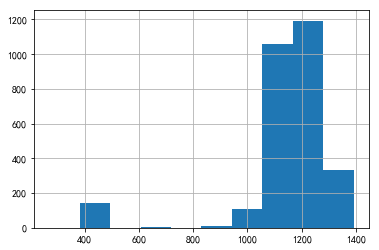

In [32]:
df_median.groupby('dt').count().reset_index()[['dt','lat']].lat.hist()

# remove abnormal


## if the location ever output the value larger than threshold, remove all values output by the location

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


count    3.278821e+06
mean     2.823556e+01
std      2.210045e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.500000e+01
75%      4.100000e+01
max      5.000000e+02
Name: pm25, dtype: float64

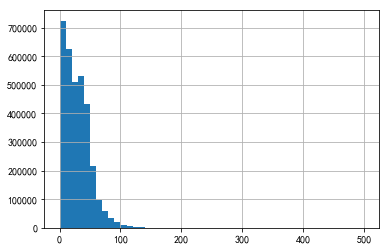

In [34]:
df_median.pm25.hist(bins=50)
df_median.pm25.describe()


In [35]:
df_median[df_median.pm25>300].groupby(['lat','lon']).count()

,,dt,pm25,pm10,temperature,humidity
lat,lon,,,,,
2.981,101.614,1,1,1,1,1
3.249,101.529,1,1,1,1,1
7.418,3.934,4,4,4,4,4
20.581,-101.229,1,1,1,1,1
22.386,120.601,1,1,1,1,1
22.409,120.586,1,1,1,1,1
22.460,120.446,1,1,1,1,1
22.477,120.487,2,2,2,2,2
22.484,120.471,1,1,1,1,1


In [36]:
# get abnormal locs
threshold=300
abnorm_locations=df_median[df_median.pm25>threshold].drop_duplicates(subset=['lat','lon'])
abnorm_locations=abnorm_locations[['lat','lon']].values
abnorm_locations.shape

(111, 2)

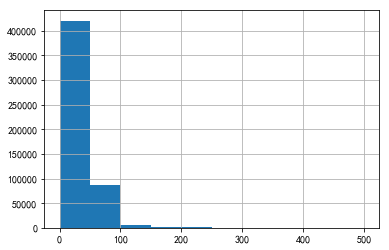

In [37]:
# abnormal locs, distribution
c=df_median.apply(lambda row: (row.lat,row.lon) in abnorm_locations,axis=1)
df_median[c].pm25.hist()

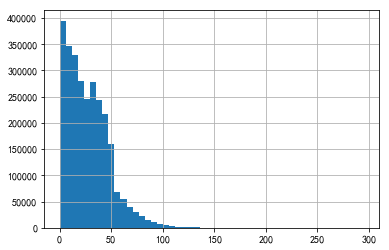

In [38]:
# distribution after remove abnormal locs 
c=df_median.apply(lambda row: (row.lat,row.lon) not in abnorm_locations,axis=1)
df_removeAbnormal=df_median[c]
df_removeAbnormal.pm25.hist(bins=50)

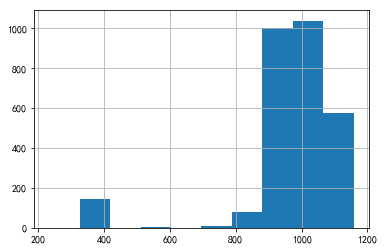

In [39]:
df_removeAbnormal.groupby('dt').count().reset_index()[['dt','lat']].lat.hist()

## only remove rows where pm25>300

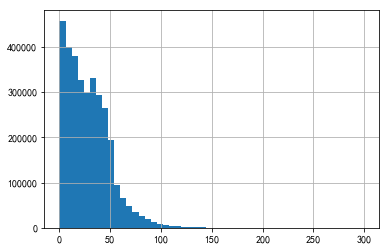

In [40]:
c=df_median.apply(lambda row: row.pm25<300, axis=1)
df_removeAbnormal=df_median[c]
df_removeAbnormal.pm25.hist(bins=50)

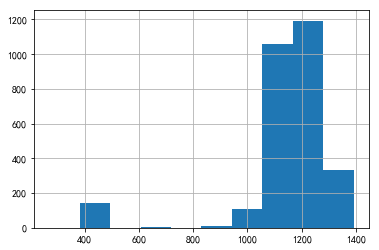

In [41]:
df_removeAbnormal.groupby('dt').count().reset_index()[['dt','lat']].lat.hist()

# script

In [49]:
def get_one_year(year):  
    print(year)
    path=os.path.join('~','station2grid','datasets','rawdata','air','airbox-%s.csv'%(year))
    df=pd.read_csv(path)
    df=df[:100000].copy() ###
    
    df['dt']=df.apply(lambda row: row['Date']+' '+row['Time'],axis=1)
    df['dt2']=df['dt'].apply(lambda x: change_time_interval(x,30))
    df_median=df.groupby(by=['dt2','lat','lon']).median().reset_index(drop=False)
    df_median=df_median.drop(columns=['PM1'])
    columns={
        'dt2':'dt',
        'PM2.5':'pm25',
        'PM10':'pm10',
        'Temperature':'temperature',
        'Humidity':'humidity',
    }
    df_median=df_median.rename(columns=columns)
    
    # remove abnormal
    pm25_threshold=350
#     abnorm_locs=df_median[df_median.pm25>pm25_threshold].drop_duplicates(subset=['lat','lon'])
#     abnorm_locs=abnorm_locs[['lat','lon']].values
#     c=df_median.apply(lambda row: (row.lat,row.lon) not in abnorm_locs,axis=1)
#     df_removeAbnormal=df_median[c]
    
    c=df_median.apply(lambda row: row.pm25<pm25_threshold, axis=1)
    df_removeAbnormal=df_median[c]

    return df_removeAbnormal

In [50]:
dfs=[get_one_year(year) for year in [2017,2018]]            
df=pd.concat(dfs,axis=0)

In [ ]:
df.tail()

In [ ]:
df.pm25.hist()

In [ ]:
df.groupby('dt').count().reset_index()[['dt','lat']].lat.hist()